In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,r2_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor,GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.externals import joblib
from sklearn.decomposition import PCA
from scipy.stats import zscore
import pandas_profiling
import pickle
%matplotlib inline
import plotly.offline as py

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data-Science-ML-Capstone-Projects-master/Data-Science-ML-Capstone-Projects-master/avocado.csv.zip (Unzipped Files)/avocado.csv')

In [ ]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
data= data[['Date','AveragePrice','Total Volume','4046','4225','4770','type','year','region']]

Extracting The **attributes** On Which We need to Work On 

In [ ]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,Albany


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   type          18249 non-null  object 
 7   year          18249 non-null  int64  
 8   region        18249 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


As you Can See their is No Null Value in this dataset

We Can See All the Values are Present Nothing is Missing


In [ ]:
#Checking Nulls in Every Columns 
data.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
type            0
year            0
region          0
dtype: int64

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

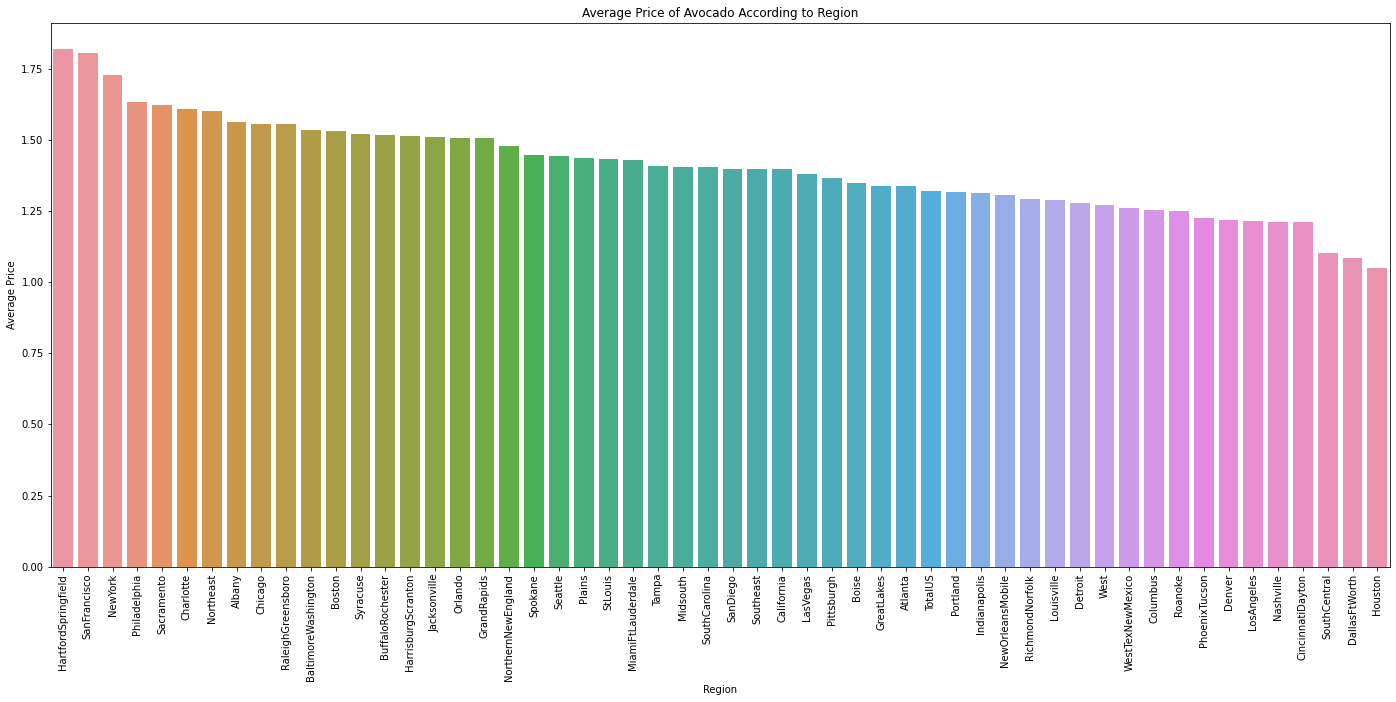

In [ ]:
region_list=list(data.region.unique())
average_price=[]

for i in region_list:
    x=data[data.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

In [ ]:
data['region'].nunique()

54

In [ ]:
data.region= pd.factorize(data.region)[0]
data.type= pd.factorize(data.type)[0]

In [ ]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,0,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,0,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,0,2015,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,0,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,0,2015,0


In [ ]:
X_C=data[['Total Volume','4046','4225','4770','type','year','region']]
y_C=data['AveragePrice']

In [ ]:
model=[DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_s=0
for r_s in range(40,90):
  X_train,X_test,y_train,y_test=train_test_split(X_C,y_C,test_size=0.2,random_state=r_s)
  for i in model:
    i.fit(X_train,y_train)
    pre=i.predict(X_test)
    r2_sc= r2_score(y_test,pre)
    if r2_sc>max_s:
      max_s=r2_sc
      final_State= r_s
      final_model=i
print()
print()

print("Max Score is ",max_s,"  For Random State ",final_State," and model is ", final_model )




Max Score is  0.7324967315111668   For Random State  78  and model is  DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


In [ ]:
Geting the Best Regressor Model 

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_C,y_C,test_size=0.2,random_state=78)

In [ ]:
Best_Model=DecisionTreeRegressor()
Best_Model.fit(X_train,y_train)
pred=Best_Model.predict(X_test)
Scor= r2_score(y_test,pred)
print(Scor)

0.7256509099553106


In [ ]:
filename = "Best_avg_Score.pkl"
pickle.dump(Best_Model, open(filename, 'wb'))

Saving the Model

In [ ]:
X_C=data[['AveragePrice','Total Volume','4046','4225','4770','type','year']]
y_C=data['region']

Creating Data For **Classification**

In [ ]:
X_C.head()

,AveragePrice,Total Volume,4046,4225,4770,type,year
0,1.33,64236.62,1036.74,54454.85,48.16,0,2015
1,1.35,54876.98,674.28,44638.81,58.33,0,2015
2,0.93,118220.22,794.70,109149.67,130.50,0,2015
3,1.08,78992.15,1132.00,71976.41,72.58,0,2015
4,1.28,51039.60,941.48,43838.39,75.78,0,2015


In [ ]:
model=[DecisionTreeClassifier(),KNeighborsClassifier(), SVC(kernel='rbf')]
max_s=0
for r_s in range(40,90):
  X_train,X_test,y_train,y_test=train_test_split(X_C,y_C,test_size=0.2,random_state=r_s)
  for i in model:
    i.fit(X_train,y_train)
    pre=i.predict(X_test)
    r2_sc=accuracy_score(y_test,pre)
    print(r_s)
    if r2_sc>max_s:
      max_s=r2_sc
      final_State= r_s
      final_model=i
print()
print()

print("Max Score is ",max_s,"  For Random State ",final_State," and model is ", final_model )

40
40
40
41
41
41
42
42
42
43
43
43
44
44
44
45
45
45
46
46
46
47
47
47
48
48
48
49
49
49
50
50
50
51
51
51
52
52
52
53
53
53
54
54
54
55
55
55
56
56
56
57
57
57
58
58
58
59
59
59
60
60
60
61
61
61
62
62
62
63
63
63
64
64
64
65
65
65
66
66
66
67
67
67
68
68
68
69
69
69
70
70
70
71
71
71
72
72
72
73
73
73
74
74
74
75
75
75
76
76
76
77
77
77
78
78
78
79
79
79
80
80
80
81
81
81
82
82
82
83
83
83
84
84
84
85
85
85
86
86
86
87
87
87
88
88
88
89
89
89


Max Score is  0.7624657534246575   For Random State  47  and model is  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


After Impelmenting All the Model i found out that the **DecisionTreeClassifier** is Best Because it have the highest Accuracy

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_C,y_C,test_size=0.2,random_state=47)
best_classifier=DecisionTreeClassifier()
best_classifier.fit(X_train,y_train)
pred=best_classifier.predict(X_test)
Scor= accuracy_score(y_test,pred)
print(Scor)

0.7586301369863013


This is the Best Model We have trained So Far.

In [ ]:
filename = "Best_region_classfier.pkl"
pickle.dump(best_classifier, open(filename, 'wb'))